<a href="https://colab.research.google.com/github/LeeIsBadK/ML_Orchid/blob/main/ML_Orchid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model machine learning ในการจำแนกพันธุ์กล้วยไม้ป่าช้างกระ (*Rhynchostylis gigantea*) กับกล้วยไม้หวาย (*Dendrobium*)
ผู้จัดทำ นาย กิตติพัฒน์ ลี้สมบัติวัฒนะ <br>
โรงเรียนมัญจาศึกษา

## Import library และ Dataset
จะใช้ library ในการ train dataset ด้วย Tensorflow และ Keras
ส่วน dataset จะเก็บไว้ใน GitHub https://github.com/LeeIsBadK/ML_Orchid

In [ ]:
import  tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from google.colab import files

In [ ]:
! git clone https://github.com/LeeIsBadK/ML_Orchid.git

Cloning into 'ML_Orchid'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 83 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (83/83), done.


## เตรียม Dataset

In [ ]:
import pathlib
# Got Bug when use colab directory
data_path = 'https://github.com/LeeIsBadK/ML_Orchid/tree/main/Database/Train'


train_dir = tf.keras.utils.get_file ('Train',origin = data_path, untar=True)
train_dir = pathlib.Path(train_dir)

  90112/Unknown - 0s 1us/step

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory('/content/ML_Orchid/Database/Train',
                                          target_size= (200,200),
                                          batch_size =3,
                                          class_mode ='binary')
validation_dataset = train.flow_from_directory('/content/ML_Orchid/Database/Validation',
                                               target_size=(200,200),
                                               batch_size = 3,
                                               class_mode='binary')

Found 32 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

## สร้าง Model

In [ ]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape = (200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   #
                                   ##
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   tf.keras.layers.Dense(1,activation='sigmoid')
                                   ])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate=0.001),
              metrics = ['accuracy'])

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs=100,
                      validation_data = validation_dataset)

Epoch 1/100
3/3 [==============================] - 3s 595ms/step - loss: 1.3284 - accuracy: 0.5556 - val_loss: 0.6983 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 1s 445ms/step - loss: 0.7700 - accuracy: 0.5556 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 1s 556ms/step - loss: 0.6824 - accuracy: 0.7500 - val_loss: 0.6974 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 2s 582ms/step - loss: 1.0163 - accuracy: 0.3750 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 1s 414ms/step - loss: 0.6168 - accuracy: 0.7778 - val_loss: 1.0941 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 1s 390ms/step - loss: 2.1744 - accuracy: 0.5556 - val_loss: 0.6870 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 1s 382ms/step - loss: 0.7273 - accuracy: 0.3333 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 8/100
3

## การนำไปใช้


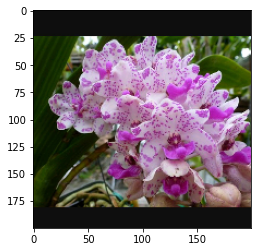

1
[[1.]]
Rhynchostylis gigantea


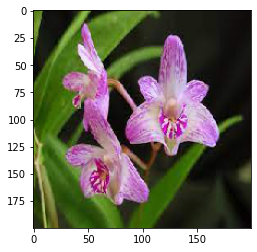

0
[[1.]]
Rhynchostylis gigantea


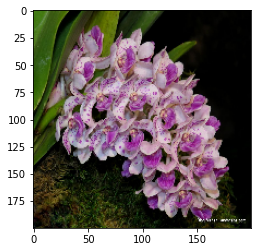

1
[[1.]]
Rhynchostylis gigantea


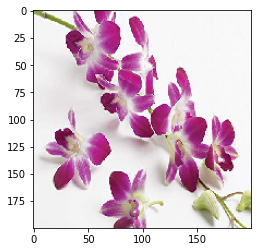

0
[[0.]]
Dendrobium


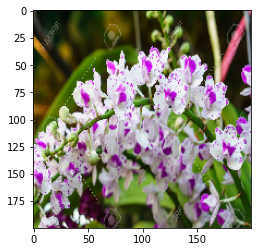

1
[[1.]]
Rhynchostylis gigantea


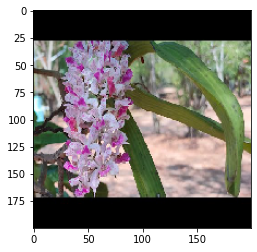

1
[[1.]]
Rhynchostylis gigantea


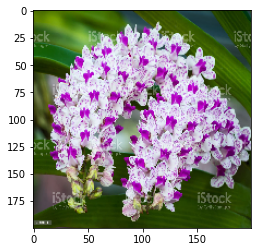

1
[[1.]]
Rhynchostylis gigantea


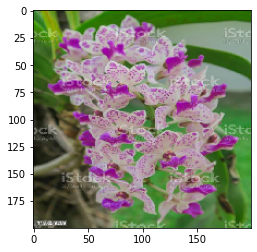

1
[[1.]]
Rhynchostylis gigantea


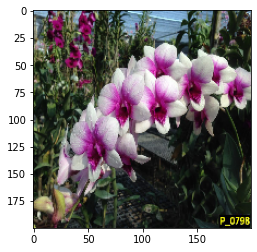

0
[[0.]]
Dendrobium


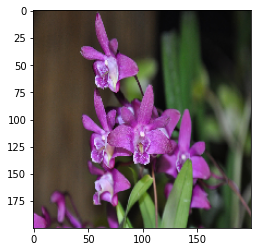

0
[[0.]]
Dendrobium


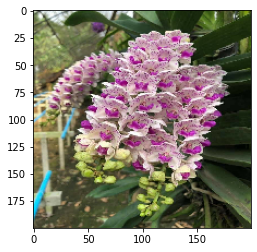

1
[[1.]]
Rhynchostylis gigantea


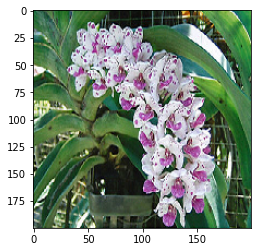

1
[[1.]]
Rhynchostylis gigantea


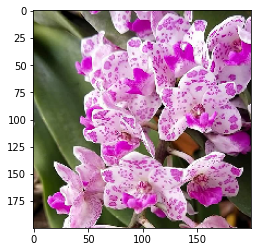

1
[[1.]]
Rhynchostylis gigantea


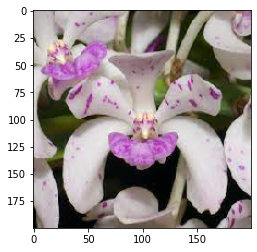

1
[[1.]]
Rhynchostylis gigantea


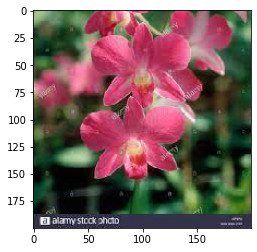

0
[[0.]]
Dendrobium


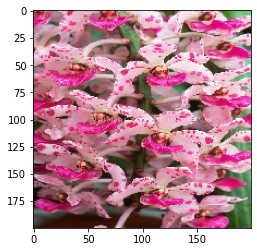

1
[[1.]]
Rhynchostylis gigantea


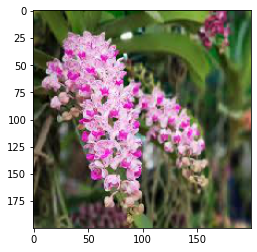

1
[[0.]]
Dendrobium


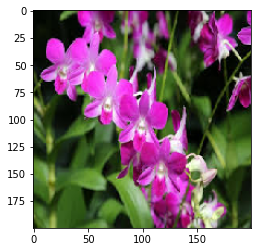

0
[[0.]]
Dendrobium


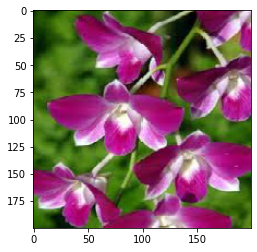

0
[[0.]]
Dendrobium


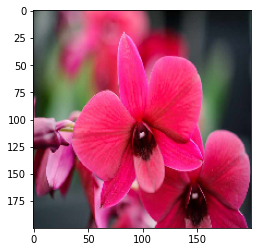

0
[[0.]]
Dendrobium


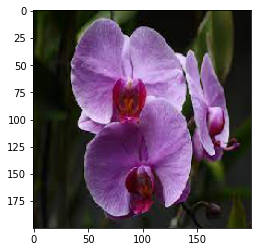

0
[[0.]]
Dendrobium


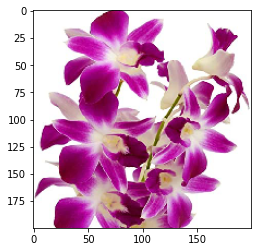

0
[[1.]]
Rhynchostylis gigantea


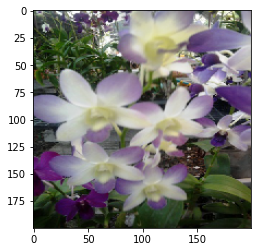

0
[[1.]]
Rhynchostylis gigantea


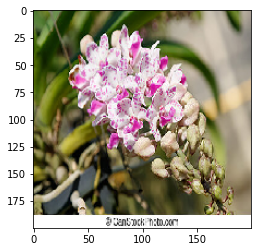

1
[[1.]]
Rhynchostylis gigantea
Accuracy =  0.8333333333333334
20 24


In [ ]:
dir_part = r'/content/ML_Orchid/Database/Test'

acc = 0
for i in os.listdir(dir_part):
    global acc
    img = image.load_img(dir_part+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    z = int(i[-5])
    print(z)

    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    val = model.predict(images)
    print(val)
    if val == 0 :
        print('Dendrobium')
        ac = 0
    else:
        print('Rhynchostylis gigantea')
        ac = 1
    if z == ac :
        acc = acc + 1
print('Accuracy = ' , acc /len(os.listdir(dir_part)))
print(acc,len(os.listdir(dir_part)))

